In [8]:
# Import core libraries
#import tweepy           # Obtain Tweets via API
import re               # Obtain expressions 
from gensim.models import Word2Vec    #Import gensim Word2Fec
from sklearn.decomposition import PCA #Grab PCA functions
from gensim.test.utils import common_texts
import plotly.express as px
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

In [31]:
model = Word2Vec(sentences=common_texts, window=5, min_count=1, workers=4)
print(model)

Word2Vec(vocab=12, size=100, alpha=0.025)


In [9]:
lines = open("wordlist.txt").readlines()
list_word = []
for l in lines:
    l = l.replace("\n","") 
    list_word.append(l.split(" "))


In [10]:
list_word2 = [['Word'],
 ['ant'],
 ['bear'],
 ['beaver'],
 ['bee'],
 ['bird']]

In [41]:
list_word2

[['Word'], ['ant'], ['bear'], ['beaver'], ['bee'], ['bird']]

In [8]:
### This is old, not using this box
#Load data
#import pandas as pd
#from pandas import DataFrame
#words = pd.read_csv('wordlist3.csv')
#wordsTxt = open("wordlist.txt","a")
#words = pd.read_csv('wordlist3.csv')
#print(words[0:5])
#wordsTxt

<_io.TextIOWrapper name='wordlist.txt' mode='a' encoding='cp1252'>

In [11]:
model_len12 = Word2Vec(list_word, min_count = 1, size = 3)
print(model_len12)
#model_len4 = Word2Vec(tokenised, min_count = 3, size = 4)
#print(model_len4)

Word2Vec(vocab=1548, size=3, alpha=0.025)


In [12]:
print(model_len12['flour'])

[-0.03803593 -0.14262646 -0.0052677 ]


<ipython-input-12-ebe1112838f9>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model_len12['flour'])


In [118]:
#Visualize with PCA
X = model_len12[model_len12.wv.vocab]
pca = PCA(n_components = 2)
result12 = pca.fit_transform(X)


<ipython-input-118-f796b0fb453b>:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [13]:
model_len12[model_len12.wv.vocab]

<ipython-input-13-2984b9bda4ab>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model_len12[model_len12.wv.vocab]


array([[ 0.02265198,  0.13731866,  0.1265927 ],
       [-0.06214271, -0.078821  ,  0.12762974],
       [-0.0613762 ,  0.01495426, -0.12790312],
       ...,
       [-0.08522952,  0.08584881, -0.13055275],
       [-0.09957143, -0.149802  , -0.09968552],
       [ 0.02869509, -0.00224019,  0.13750982]], dtype=float32)

In [119]:
total_var = pca.explained_variance_ratio_.sum() * 100

In [120]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig5 = px.scatter_matrix(
    result12,
    dimensions=range(2),
    title=f'Embedding length 12 <br> Total Explained Variance: {total_var:.2f}%',
)
fig5.show()

In [121]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_embedded = tsne.fit_transform(X)

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

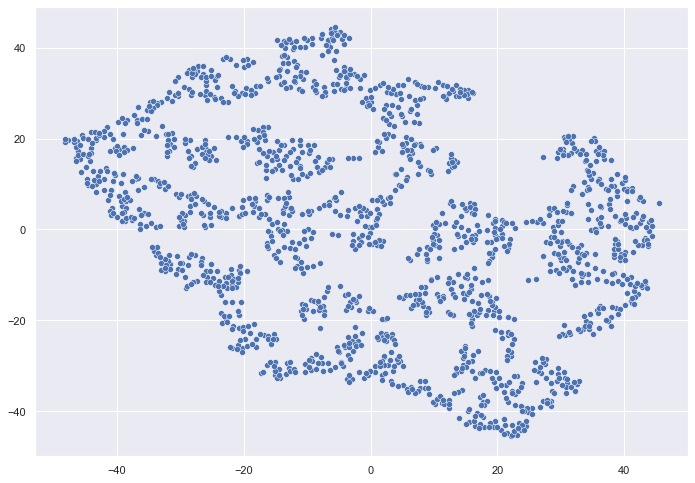

In [122]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)

In [69]:
#conda install -c plotly plotly=4.14.3
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

In [21]:
fig4 = px.scatter_matrix(
    result4,
    dimensions=range(2),
    title=f'Embedding length 4: <br> Total Explained Variance: {total_var:.2f}%',
)
fig4.show()

NameError: name 'result4' is not defined

In [34]:
fig = px.scatter_matrix(
    result3,
    dimensions=range(2),
    title=f'Embedding length 3: <br> Total Explained Variance: {total_var:.2f}%',
)
fig.show()

In [47]:
#Visualize with PCA
X = model_len2[model_len2.wv.vocab]
pca = PCA(n_components = 2)
result2 = pca.fit_transform(X)
fig2 = px.scatter_matrix(
    result2,
    dimensions=range(2),
    title=f'Embedding length 2: <br> Total Explained Variance: {total_var:.2f}%',
)
fig2.show()

<ipython-input-47-64d196a1e362>:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



<IPython.core.display.Javascript object>


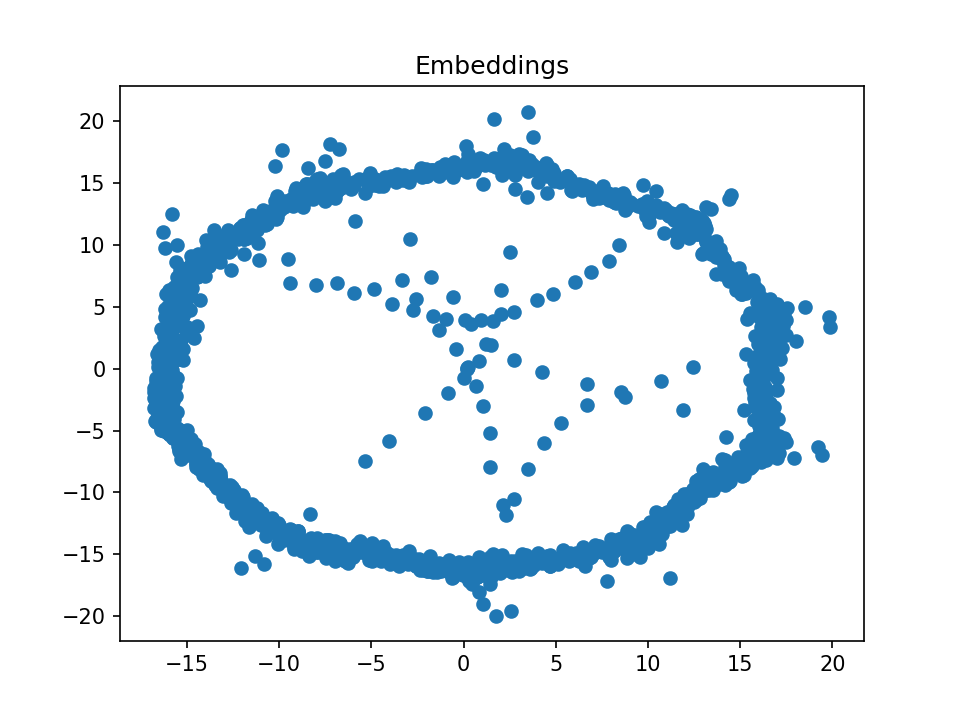

In [39]:
#Plot helpers
import matplotlib
import matplotlib.pyplot as plt
#Enable matplotlib to be interactive (zoom etc)
%matplotlib notebook

# create a plot of the projection
fig, ax = plt.subplots()
ax.plot(result[:, 0], result[:, 1], 'o')
ax.set_title('Embeddings')
plt.show()

In [125]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


In [126]:
model = model_len12
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

<ipython-input-126-cee03afbc68d>:8: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



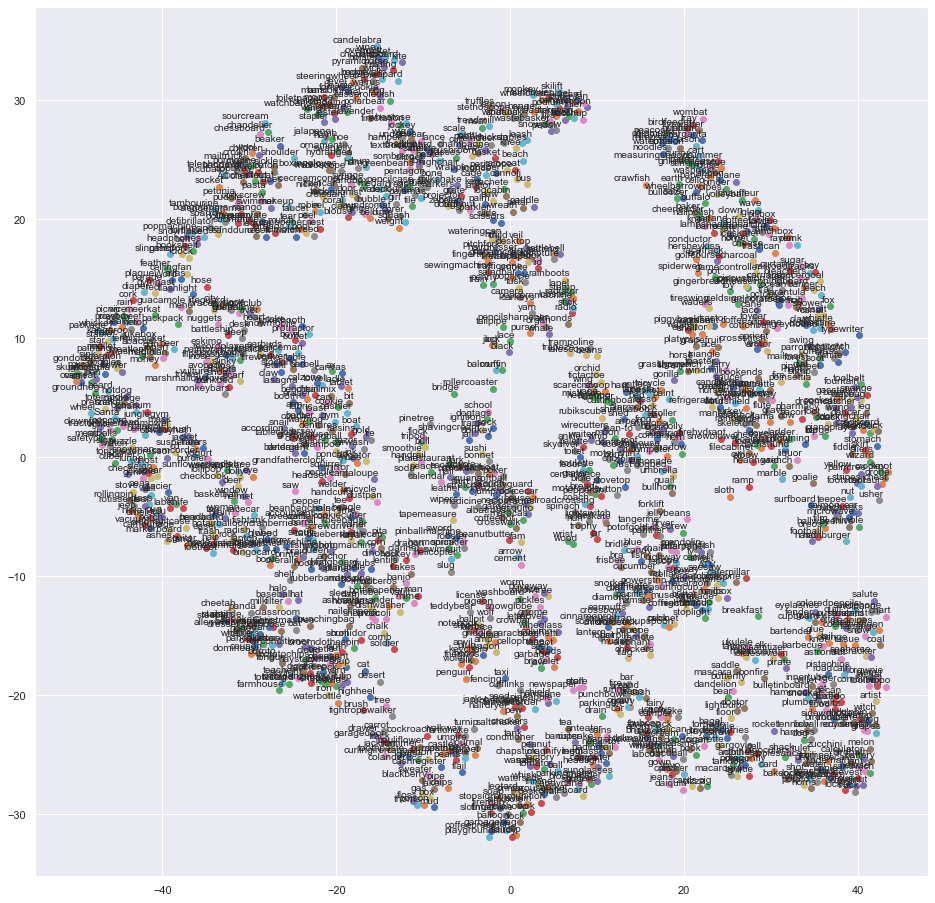

In [127]:
tsne_plot(model)

I think that the above code creates a word2vec model from the provided data only.  Given that there is no overlap in words I believe that it is going to be too sparse to create similar vectors for semantically similar words.

In [1]:
import gensim
from gensim.matutils import corpus2csc
from gensim.corpora import Dictionary
import pandas as pd
import numpy as np

In [2]:
#Load data
import pandas as pd
from pandas import DataFrame
words = pd.read_csv('wordlist3.csv')
#words.columns = ['Number', 'Word']

df = DataFrame(words, columns= ['Word'])
df_list = df.values.tolist()

In [3]:
df

Word
0          ant
1         bear
2       beaver
3          bee
4         bird
...        ...
1543       map
1544    flower
1545  mountain
1546      tree
1547   volcano

[1548 rows x 1 columns]

In [39]:
#Method 1: Get word embeddings for all available words from Wikigigaworld.
import gensim.downloader as api
# Download dataset
glove_model50 = api.load('glove-wiki-gigaword-50')
#create np array called word_array
word_array = np.empty((0, 50))
not_found = []
for idx, row in words.iterrows():
    try:
        result = glove_model50.word_vec(row[0])
        word_array = np.append(word_array, [result], axis = 0)
    except KeyError:
        not_found.append(row[0]) 

In [40]:
word_array

array([[ 0.67339998, -0.48774001, -0.58609998, ..., -0.80836999,
         0.42368999,  0.10184   ],
       [ 0.57121003,  0.71623999, -0.10722   , ...,  0.0087279 ,
         0.13338999, -0.061488  ],
       [-0.063412  ,  0.72070003, -0.46972999, ..., -0.81309003,
         0.2098    ,  0.41644001],
       ...,
       [ 0.44468999,  1.74109995,  0.24895   , ..., -1.10370004,
         0.0058918 , -0.86150998],
       [ 0.62230998,  1.19860005, -0.014116  , ..., -1.74679995,
         0.82453001, -1.08860004],
       [ 1.71010005,  0.61993998,  0.53048003, ..., -0.14551   ,
        -0.63933003, -1.38520002]])

In [41]:
model = np.float32(word_array)

In [42]:
#convert to float32
model = np.float32(word_array)
#Visualize with PCA
X = model
pca = PCA(n_components = 2)
result12 = pca.fit_transform(X)

In [43]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig5 = px.scatter_matrix(
    result12,
    dimensions=range(2),
    title=f'Embedding length 12 <br> Total Explained Variance: {total_var:.2f}%',
)
fig5.show()

In [24]:
tsne = TSNE

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_embedded = tsne.fit_transform(model)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

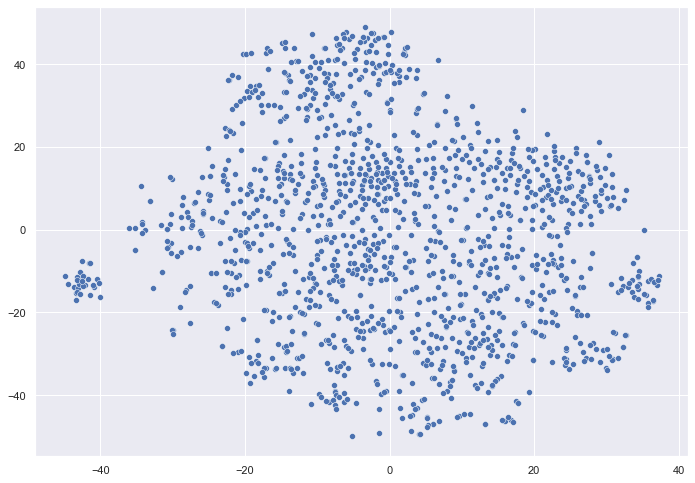

50d, 100d, 200d, & 300d

In [47]:
#Method 1: Get word embeddings for all available words from Wikigigaworld.
import gensim.downloader as api
# Download dataset
glove_model100 = api.load('glove-wiki-gigaword-100')
#create np array called word_array
word_array = np.empty((0, 100))
not_found = []
for idx, row in words.iterrows():
    try:
        result = glove_model100.word_vec(row[0])
        word_array = np.append(word_array, [result], axis = 0)
    except KeyError:
        not_found.append(row[0]) 

KeyboardInterrupt: 

In [48]:
#convert to float32
model = np.float32(word_array)
#Visualize with PCA
X = model
pca = PCA(n_components = 2)
result12 = pca.fit_transform(X)

In [49]:
total_var = pca.explained_variance_ratio_.sum() * 100
fig5 = px.scatter_matrix(
    result12,
    dimensions=range(2),
    title=f'Embedding length 12 <br> Total Explained Variance: {total_var:.2f}%',
)
fig5.show()

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

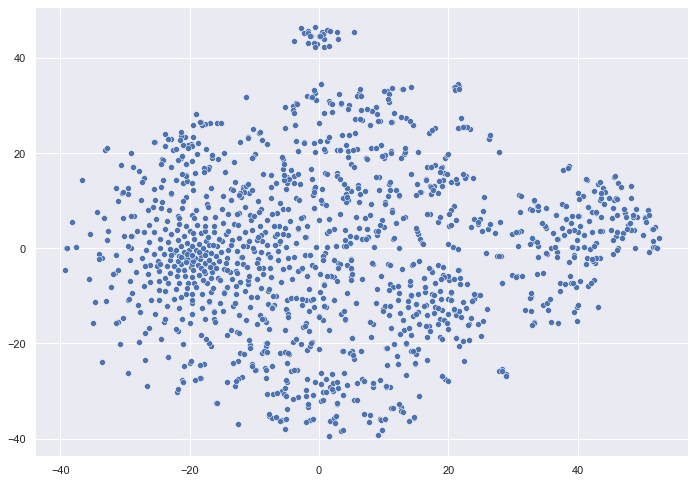

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_embedded = tsne.fit_transform(model)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)

In [51]:
#Method 1: Get word embeddings for all available words from Wikigigaworld.
import gensim.downloader as api
# Download dataset
glove_model300 = api.load('glove-wiki-gigaword-300')
#create np array called word_array
word_array = np.empty((0, 300))
not_found = []
for idx, row in words.iterrows():
    try:
        result = glove_model300.word_vec(row[0])
        word_array = np.append(word_array, [result], axis = 0)
    except KeyError:
        not_found.append(row[0]) 

In [52]:
#PCA CODE AND OUTPUT
#convert to float32
model = np.float32(word_array)
#Visualize with PCA
X = model
pca = PCA(n_components = 2)
result12 = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100
fig5 = px.scatter_matrix(
    result12,
    dimensions=range(2),
    title=f'Embedding length 12 <br> Total Explained Variance: {total_var:.2f}%',
)
fig5.show()

C:\Users\alexa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

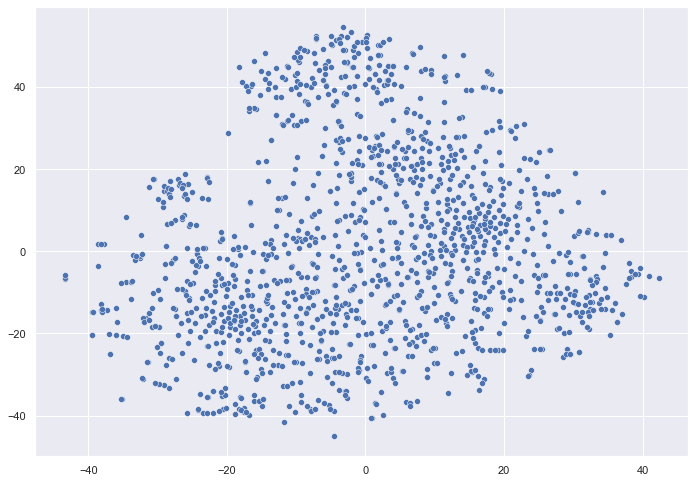

In [53]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_embedded = tsne.fit_transform(model)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)